## Detailed Article Explaination

The detailed code explanation for this article is available at the following link:

https://www.daniweb.com/programming/computer-science/tutorials/542151/extracting-youtube-channel-statistics-in-python-using-youtube-data-api

For my other articles for Daniweb.com, please see this link:

https://www.daniweb.com/members/1235222/usmanmalik57

## Installing and Importing Required Libraries

In [34]:
!pip install google-api-python-client
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 901.1 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 215.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 215.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 215.0/300.2 kB 1.1 MB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 719.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 719.7 kB/s eta 0:00:01
   --

In [35]:
import googleapiclient.discovery
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

## Extracting YouTube Channel Statistics

In [9]:
# API information
api_service_name = "youtube"
api_version = "v3"

# API key
DEVELOPER_KEY = "YOUR_API_KEY"

# API client
youtube = googleapiclient.discovery.build(
    api_service_name, 
    api_version, 
    developerKey=DEVELOPER_KEY)

In [10]:
# Channel ID of the channel you want to search
channel_id = "UCYNS-_653RIE9x_BINefAMA"


# Request to retrieve all video titles for the specified channel
request = youtube.search().list(
    part="snippet",
    channelId=channel_id,
    maxResults=50,
    type="video"
)

# Initialize an empty list to store the video titles
video_titles = []

# Execute the request and retrieve the results
while request is not None:
    response = request.execute()
    for item in response["items"]:
        video_titles.append(item["snippet"]["title"])
    request = youtube.search().list_next(request, response)


In [32]:
# Print the video titles
print("Total extracted videos:", len(video_titles))
print("First 10 videos")
print("===============")
for title in video_titles[:10]:
    print(title)

Total extracted videos: 520
First 10 videos
رئوف حسن امریکی شہری
بشری بی بی کے مؤکل
Main kaun? | STH | Coming Soon
نو مئی اور فوج کا پیغام #youtubeshorts #syedtalathussain #pti #pakistanpolitics  #pmln #imrankhanpti
بگڑتے معاملات اور عمران
Main Kaun? | Kashif Abbasi | STH | EP#2
شہباز حکومت اور فوج کا کندھا  #youtubeshorts #syedtalathussain #pti #sth #pakistanpolitics #viral
وزیر اعلیٰ پنجاب مریم کے اہداف
نواز لیگ اور نواز شریف۔  #youtubeshorts #syedtalathussain #pti #pmln #sth #pakistanpolitics #viral
ثوبیہ شاہد اور مخالفین کی غلاظت


### Plotting a Bar Plot with Most Frequently Occuring Words

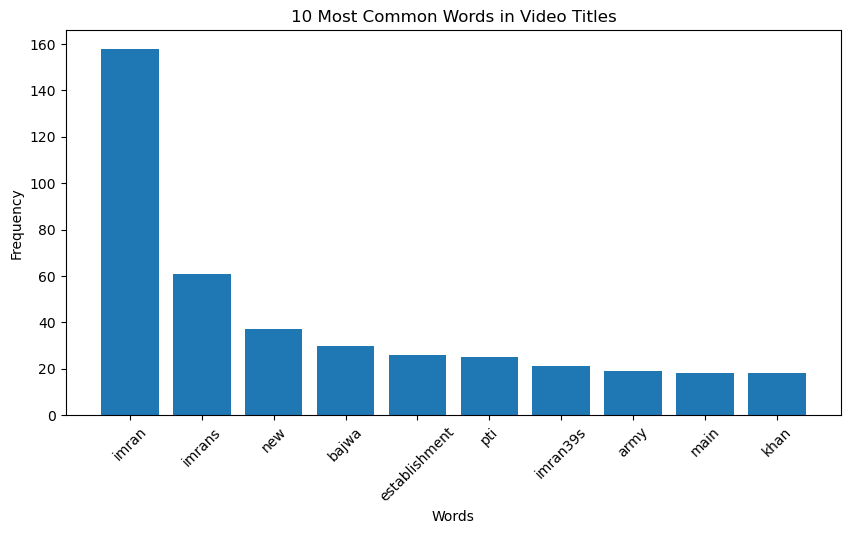

In [39]:

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Filter videos with Latin text only
latin_titles = [title for title in video_titles if re.search(r'[a-zA-Z]', title)]

# Remove special characters and tokenize
words = []
stop_words = set(stopwords.words('english')) | {'sth', 'syed', 'talat', 'hussain'}
for title in latin_titles:
    cleaned_title = re.sub(r'[^\w\s]', '', title)  # Remove special characters
    for word in re.findall(r'\b\w+\b', cleaned_title):
        if word.lower() not in stop_words:
            words.append(word.lower())

# Count the frequency of words
word_counts = Counter(words)

# Get the 10 most common words
most_common_words = [word for word, count in word_counts.most_common(10) if word not in {'sth', 'syed', 'talat', 'hussain'}]

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(most_common_words)), [word_counts[word] for word in most_common_words])
plt.title('10 Most Common Words in Video Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(range(len(most_common_words)), most_common_words, rotation=45)
plt.show()

### Word Cloud of Video Titles

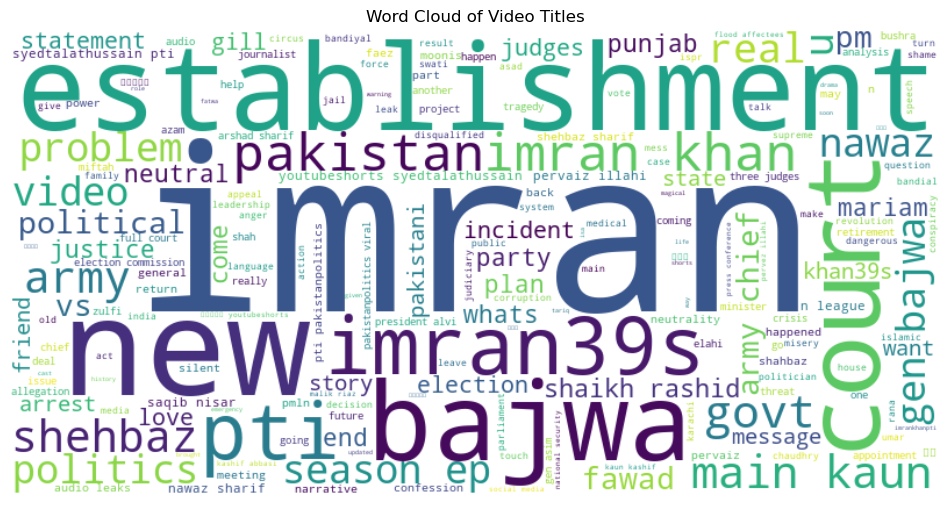

In [40]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Video Titles")
plt.show()